<a href="https://colab.research.google.com/github/peeyushsinghal/EVA/blob/main/S10-Assignment/EVA_S10_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment Objectives

1. Download this file. Learn how COCO object detection dataset's schema is. This file has the same schema. You'll need to discover what those number are. 
2. Identify these things for this dataset:
*  readme data for class distribution (along with the class names) along with a graph
*   Calculate the Anchor Boxes for k = 3, 4, 5, 6 and draw them.
Share the calculations for both via a notebook uploaded on your GitHub Repo

In [109]:
import pandas as pd
import re
import urllib
import matplotlib.pyplot as plt
import numpy as np


In [1]:
file_path:str = '/content/sample_coco.txt'

In [ ]:
# looking a the file,it appeared more of text data rather than columnar data
# df = pd.read_csv(file_path)
# df.head()

In [21]:
def read_file_lines(file_path):
  try:
    file_obj = open(file_path,"r") # r = read
    file_lines = file_obj.readlines()
    file_obj.close()

  except:
    print("Not able to open file")

  return file_lines

def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""

In [11]:
# reading the file lines, each line is a string and file_line is a list of string
file_lines = read_file_lines(file_path)
file_lines[:10]

['id: 0, height: 330, width: 1093, bbox:[69, 464, 312, 175],\n',
 'id: 1, height: 782, width: 439, bbox:[359, 292, 83, 199],\n',
 'id: 3, height: 645, width: 831, bbox:[297, 312, 267, 167],\n',
 'id: 34, height: 943, width: 608, bbox:[275, 112, 319, 290],\n',
 'id: 20, height: 593, width: 857, bbox:[71, 368, 146, 147],\n',
 'id: 61, height: 587, width: 745, bbox:[177, 463, 68, 302],\n',
 'id: 16, height: 430, width: 405, bbox:[78, 295, 54, 237],\n',
 'id: 41, height: 513, width: 1179, bbox:[105, 497, 379, 321],\n',
 'id: 75, height: 638, width: 842, bbox:[192, 142, 398, 248],\n',
 'id: 12, height: 746, width: 877, bbox:[345, 441, 370, 181],\n']

In [42]:
column_list = ['id','img_height','img_width','x_min','y_min','width','height']
df = pd.DataFrame(columns=column_list)

In [48]:
# files lines are appended to a dataframe


for line in file_lines:
  # removing new line character at the end
  # print(len(line))
  # print(len(line.strip()))
  if line[-1] == ',': # last row does not have comma
    line = line[:-1]

  try:
    id_attribute = int(find_between(line,'id:',","))
    img_height_attribute = int(find_between(line,'height:',","))
    img_width_attribute = int(find_between(line,'width:',","))
    bbox_attribute = find_between(line,'[',"]")
    x_min = int(float(bbox_attribute.split(",")[0]))
    y_min = int(float(bbox_attribute.split(",")[1]))
    width = int(float(bbox_attribute.split(",")[2]))
    height = int(float(bbox_attribute.split(",")[-1]))
  except ValueError:
    print(line, bbox_attribute)

  dict_attributes = {
      "id":id_attribute,
      "img_height":img_height_attribute,
      "img_width":img_width_attribute,
      "x_min":x_min,
      "y_min":y_min,
      "width":width,
      "height":height
  }

  df = df.append(dict_attributes,ignore_index=True)
  # print(id_attribute,img_height_attribute,img_width_attribute,bbox_attribute,x_min, y_min, width,height)
  # print(dict_attributes)
  # print(find_between(line,'id:',","))
  # print(find_between(line,'bbox:',"]"))
  # print(list_attrib_values)

In [53]:
# changing dtype
df.astype('int64').dtypes
print(df.head())

id            int64
img_height    int64
img_width     int64
x_min         int64
y_min         int64
width         int64
height        int64
dtype: object

In [57]:
# creating ratio
df['width_ratio'] = (df['width']/df['img_width'])
df['height_ratio'] = (df['height']/df['img_height'])
df.head()

,id,img_height,img_width,x_min,y_min,width,height,width_ratio,height_ratio
0,0,330,1093,69,464,312,175,0.285453,0.530303
1,0,330,1093,69,464,312,175,0.285453,0.530303
2,1,782,439,359,292,83,199,0.189066,0.254476
3,3,645,831,297,312,267,167,0.3213,0.258915
4,34,943,608,275,112,319,290,0.524671,0.307529


In [87]:
series_class_distribution = df['id'].value_counts()
# df_class_distribution.head()
df_class_distribution = series_class_distribution.to_frame()
df_class_distribution.rename(columns = {'id':'count'},
          inplace = True)
df_class_distribution['id'] = df_class_distribution.index
df_class_distribution

,count,id
44,765,44
75,735,75
28,725,28
67,725,67
2,710,2
...,...,...
60,530,60
53,525,53
52,510,52
9,510,9


In [90]:
# COCO Labels found at 'https://github.com/amikelive/coco-labels/blob/master/coco-labels-2014_2017.txt'

label_file_path:str = '/content/coco_labels.txt'
# reading the file lines, each line is a string and label_file_path is a list of string
labels = read_file_lines(label_file_path)
column_list_label = ['id','img_label']
df_label = pd.DataFrame(columns=column_list_label)
for index, label in enumerate(labels):
  label = label.strip()
  if label[-1] == ',': # last row does not have comma
    label = label[:-1]
  df_label = df_label.append(pd.Series({'id':index,'img_label':label}),ignore_index=True)

df_label

,id,img_label
0,0,person
1,1,bicycle
2,2,car
3,3,motorcycle
4,4,airplane
...,...,...
75,75,vase
76,76,scissors
77,77,teddy bear
78,78,hair drier


## Plotting Class Distribution




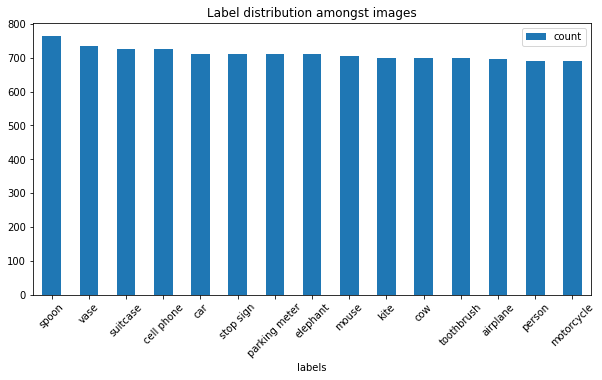

In [102]:
# merging class distribution and labels based on label ids
top_n = 15
df_overall = pd.merge(df_class_distribution,df_label,on='id', how='outer')
df_overall = df_overall.sort_values('count',ascending=False)
df_overall
ax = df_overall.head(top_n).plot.bar(x='img_label', y='count', rot=45,figsize = (10,5), title= "Label distribution amongst images",xlabel ="labels")

## K Means Clustering
### Scatter plot of bounding boxes  height and width

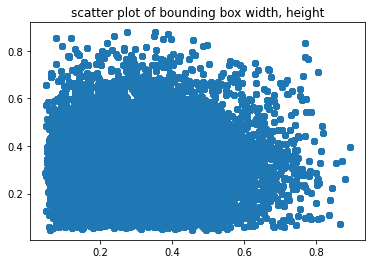

In [120]:
## bounding boxes with height and width 
bb_width_height_arr = df[["width_ratio", "height_ratio"]].to_numpy()
plt.scatter(bb_width_height_arr[:,0], bb_width_height_arr[:,1])

plt.title("scatter plot of bounding box width, height")
plt.show()


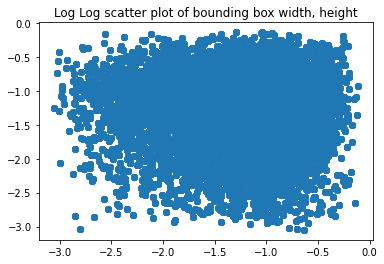

In [121]:
## Log Log scatter plot
plt.scatter(np.log(list(bb_width_height_arr[:, 0])), np.log(list(bb_width_height_arr[:, 1])))
plt.title("Log Log scatter plot of bounding box width, height")
plt.show()

### Finding optimium value of K from Elbow method

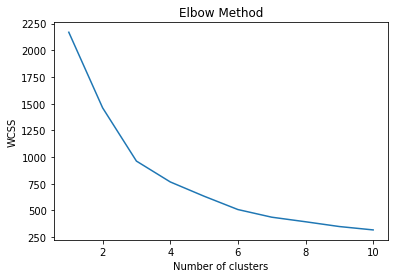

In [122]:
#Elbow Method for K Means
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(bb_width_height_arr)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

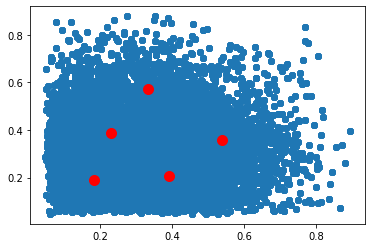

In [124]:
#Determine the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(bb_width_height_arr)
plt.scatter(bb_width_height_arr[:,0], bb_width_height_arr[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

In [126]:
from typing import List
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
def plot_anchor_boxes(num_of_clusters, centroids):
    
    xdata = np.array([0.5]*len(centroids))
    ydata = np.array([0.5]*len(centroids))

    xerror = np.array([list(np.exp(centroids[:, 0])/2)]*2)
    yerror = np.array([list(np.exp(centroids[:, 1])/2)]*2)

    errorboxes = []

    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    pc = PatchCollection(errorboxes, facecolor='None', alpha=1, edgecolor='b')
    fig, ax = plt.subplots(1)

    ax.add_collection(pc)
    plt.title(f'Anchor Boxes for number of clusters = {num_of_clusters}')
    artists = plt.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='None')

### Finding anchor box sizes for K = 3,4,5,6

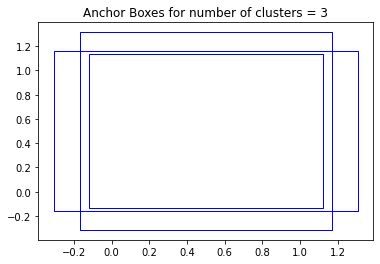

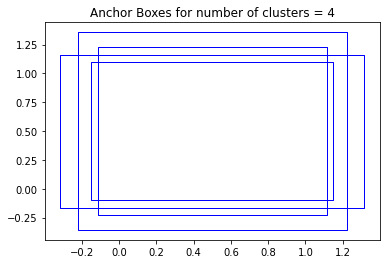

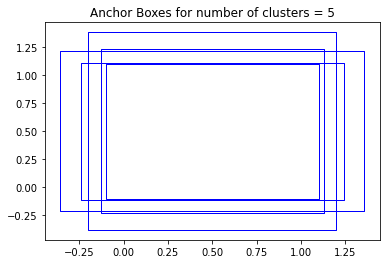

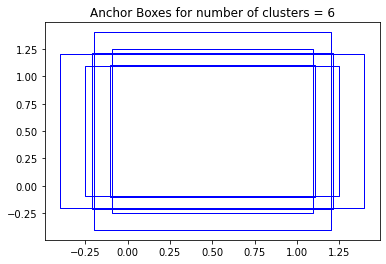

In [128]:
list_cluster_size = [3, 4, 5, 6]
for cluster_size in list_cluster_size:
  # cluster_size = 3
  kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=300, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(bb_width_height_arr)
  plot_anchor_boxes(cluster_size, kmeans.cluster_centers_)